In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
wine = load_wine()
X = wine.data  # Features (13 chemical properties)
y = wine.target

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
k_values = range(1, 21)  # Hyperparameter tuning: Find the best value of k
cv_scores = []

In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

In [9]:
best_k = k_values[np.argmax(cv_scores)]
print(f'Best k value: {best_k}')

Best k value: 18


In [10]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [11]:
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9722

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


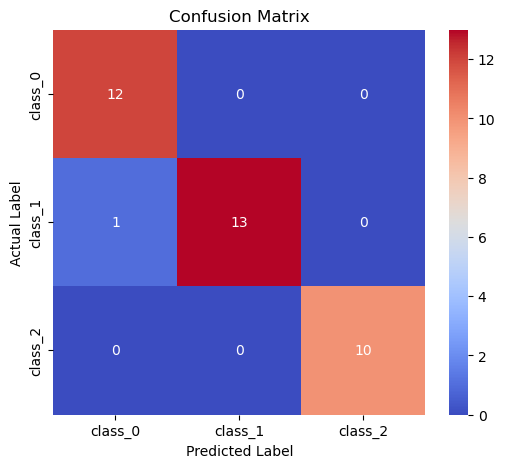

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

In [16]:
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [17]:
y_pred_svm = svm.predict(X_test)

In [18]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9722


In [19]:
models = ['KNN', 'SVM']
predictions = [y_pred, y_pred_svm]

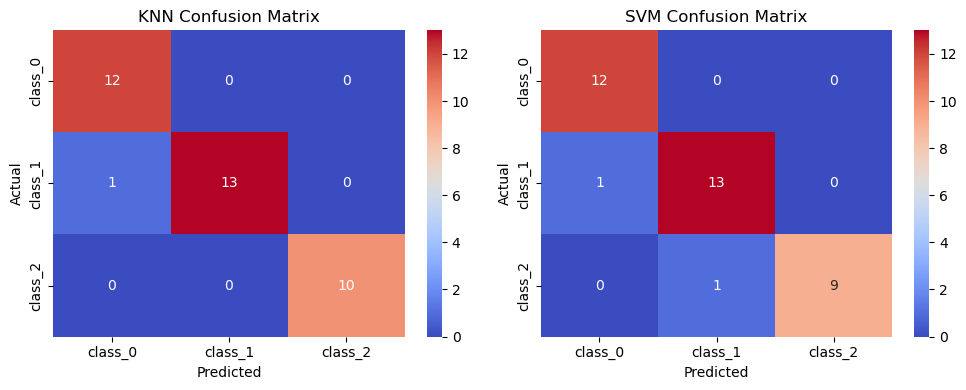

In [20]:
plt.figure(figsize=(10, 4))
for i, (model, y_pred) in enumerate(zip(models, predictions)):
    plt.subplot(1, 2, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model} Confusion Matrix')

plt.tight_layout()
plt.show()

In [21]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
knn = KNeighborsClassifier(n_neighbors=18)
svm = SVC(kernel='linear', C=1)

knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

Text(0.5, 1.0, 'KNN Decision Regions')

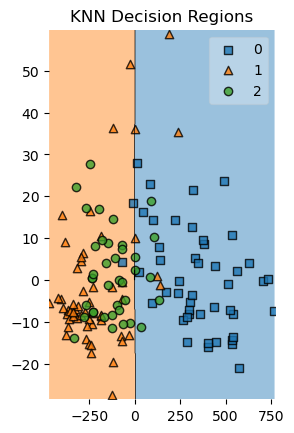

In [68]:
plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, clf=knn)
plt.title("KNN Decision Regions")

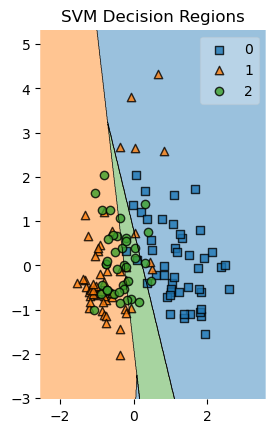

In [70]:
plt.subplot(1, 2, 2)
plot_decision_regions(X_train_scaled, y_train, clf=svm)
plt.title("SVM Decision Regions")
plt.show()